#Punto 2
Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonométrica y compacta), la transformada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y discreto y señal en tiempo continuo y discreto. Además, consulte en qué consiste el algoritmo Fast Fourier Transform - (FFT) y su utilidad para el cálculo de la transformada discreta de Fourier. Explique en detalle el algoritmo FFT y su costo computacional vs el de la transformada discreta. Ver cuaderno Transformada de Fourier.

La **serie de Fourier** permite representar señales periódicas continuas como sumas de senos, cosenos o exponenciales complejas. Cuando las señales son **no periódicas**, se utiliza la **Transformada de Fourier (FT)**, que entrega un espectro continuo de frecuencias.

Para señales **discretas**, existen dos casos: si la señal es infinita, se aplica la **Transformada de Fourier en tiempo discreto (DTFT)**, que genera un espectro continuo y periódico; pero si la señal es finita, como ocurre con audios digitales, se usa la **Transformada Discreta de Fourier (DFT)**, que entrega un número finito de frecuencias y puede implementarse computacionalmente.

La **FFT (Fast Fourier Transform)** es un algoritmo que calcula la DFT de forma eficiente, reduciendo el costo de cómputo de $O(N^2)$ a $O(N \log N)$. En el cuaderno, se usa la FFT para analizar señales de audio, revelando cómo varía su contenido frecuencial a lo largo del tiempo.



#Punto 3
Encuentre la función de densidad espectral (transformada de Fourier) para las siguientes señales (sin aplicar propiedades):


**a)**  
$$x(t) = e^{-a|t|}, \quad a \in \mathbb{R}^{+}$$

**b)**  
$$x(t) = \cos(w_c t), \quad w_c \in \mathbb{R}$$

**c)**  
$$x(t) = \sin(w_s t), \quad w_s \in \mathbb{R}$$

**d)**  
$$x(t) = f(t) \cos(w_c t), \quad w_c \in \mathbb{R}, \quad f(t) \in \mathbb{R} \cup \mathbb{C}$$

**e)**  
$$x(t) = e^{-a|t|^2}, \quad a \in \mathbb{R}^{+}$$

**f)**  
$$x(t) = A \cdot \text{rect}_d(t), \quad A, d \in \mathbb{R}$$

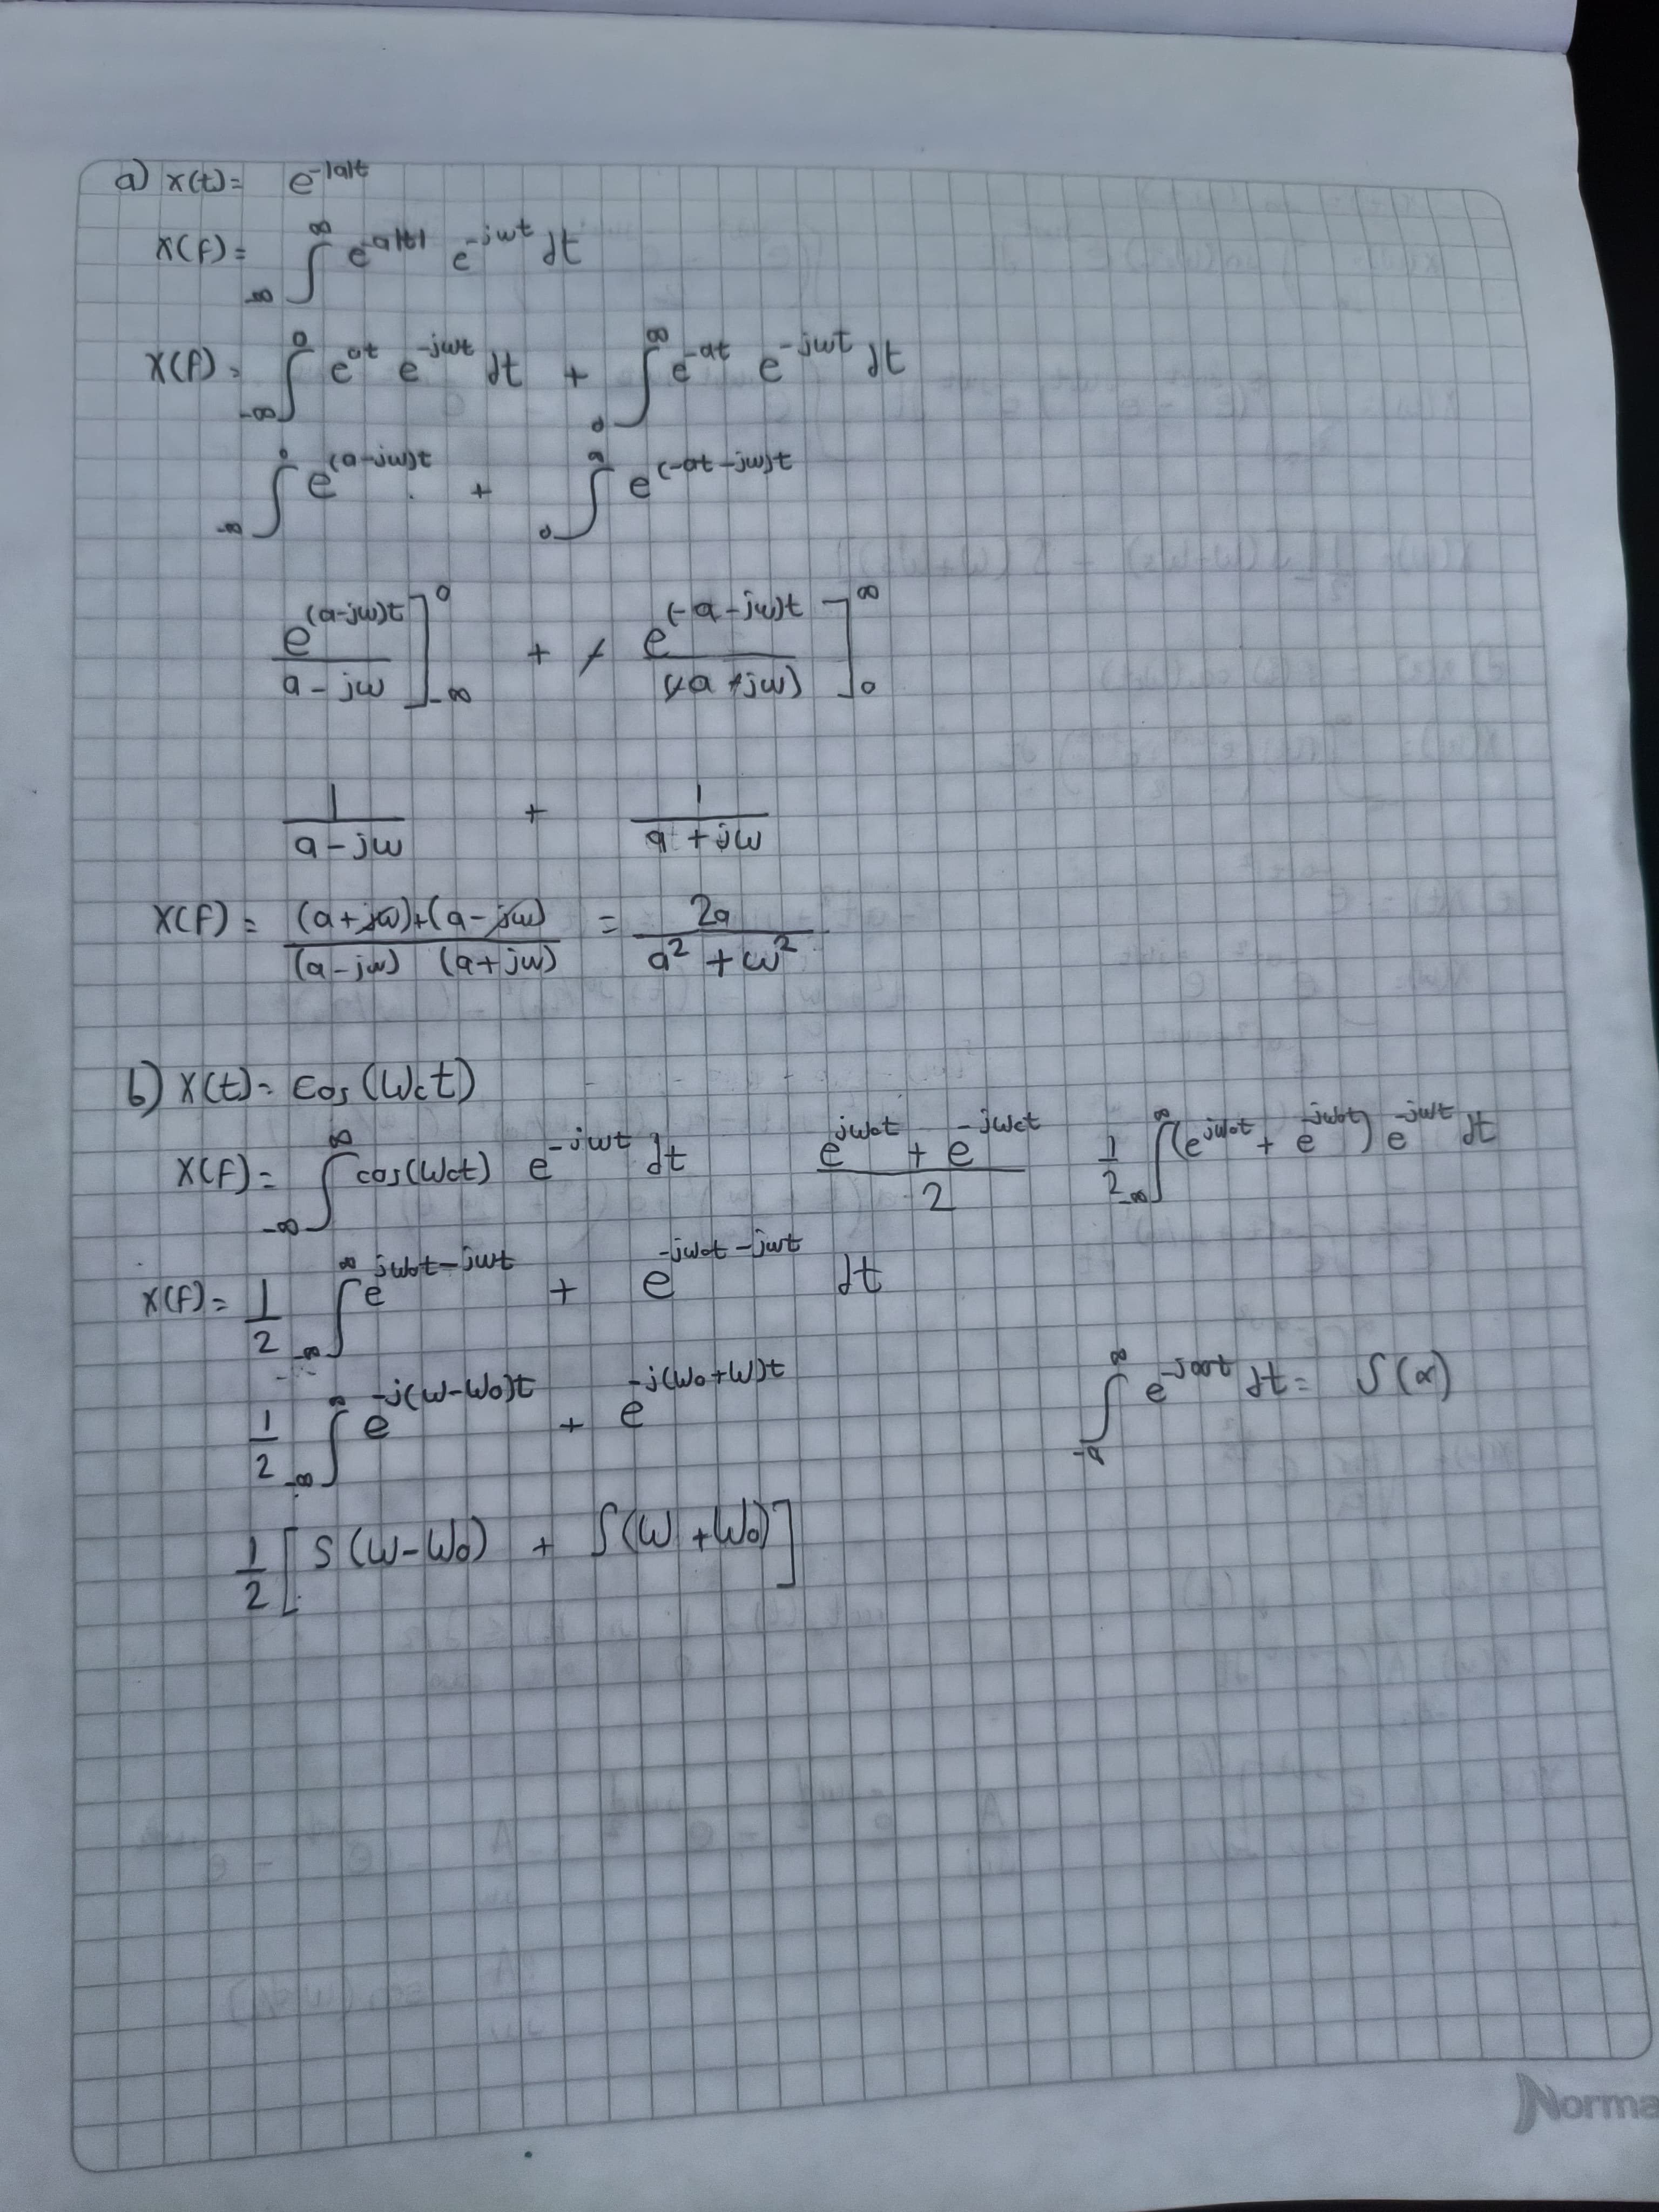

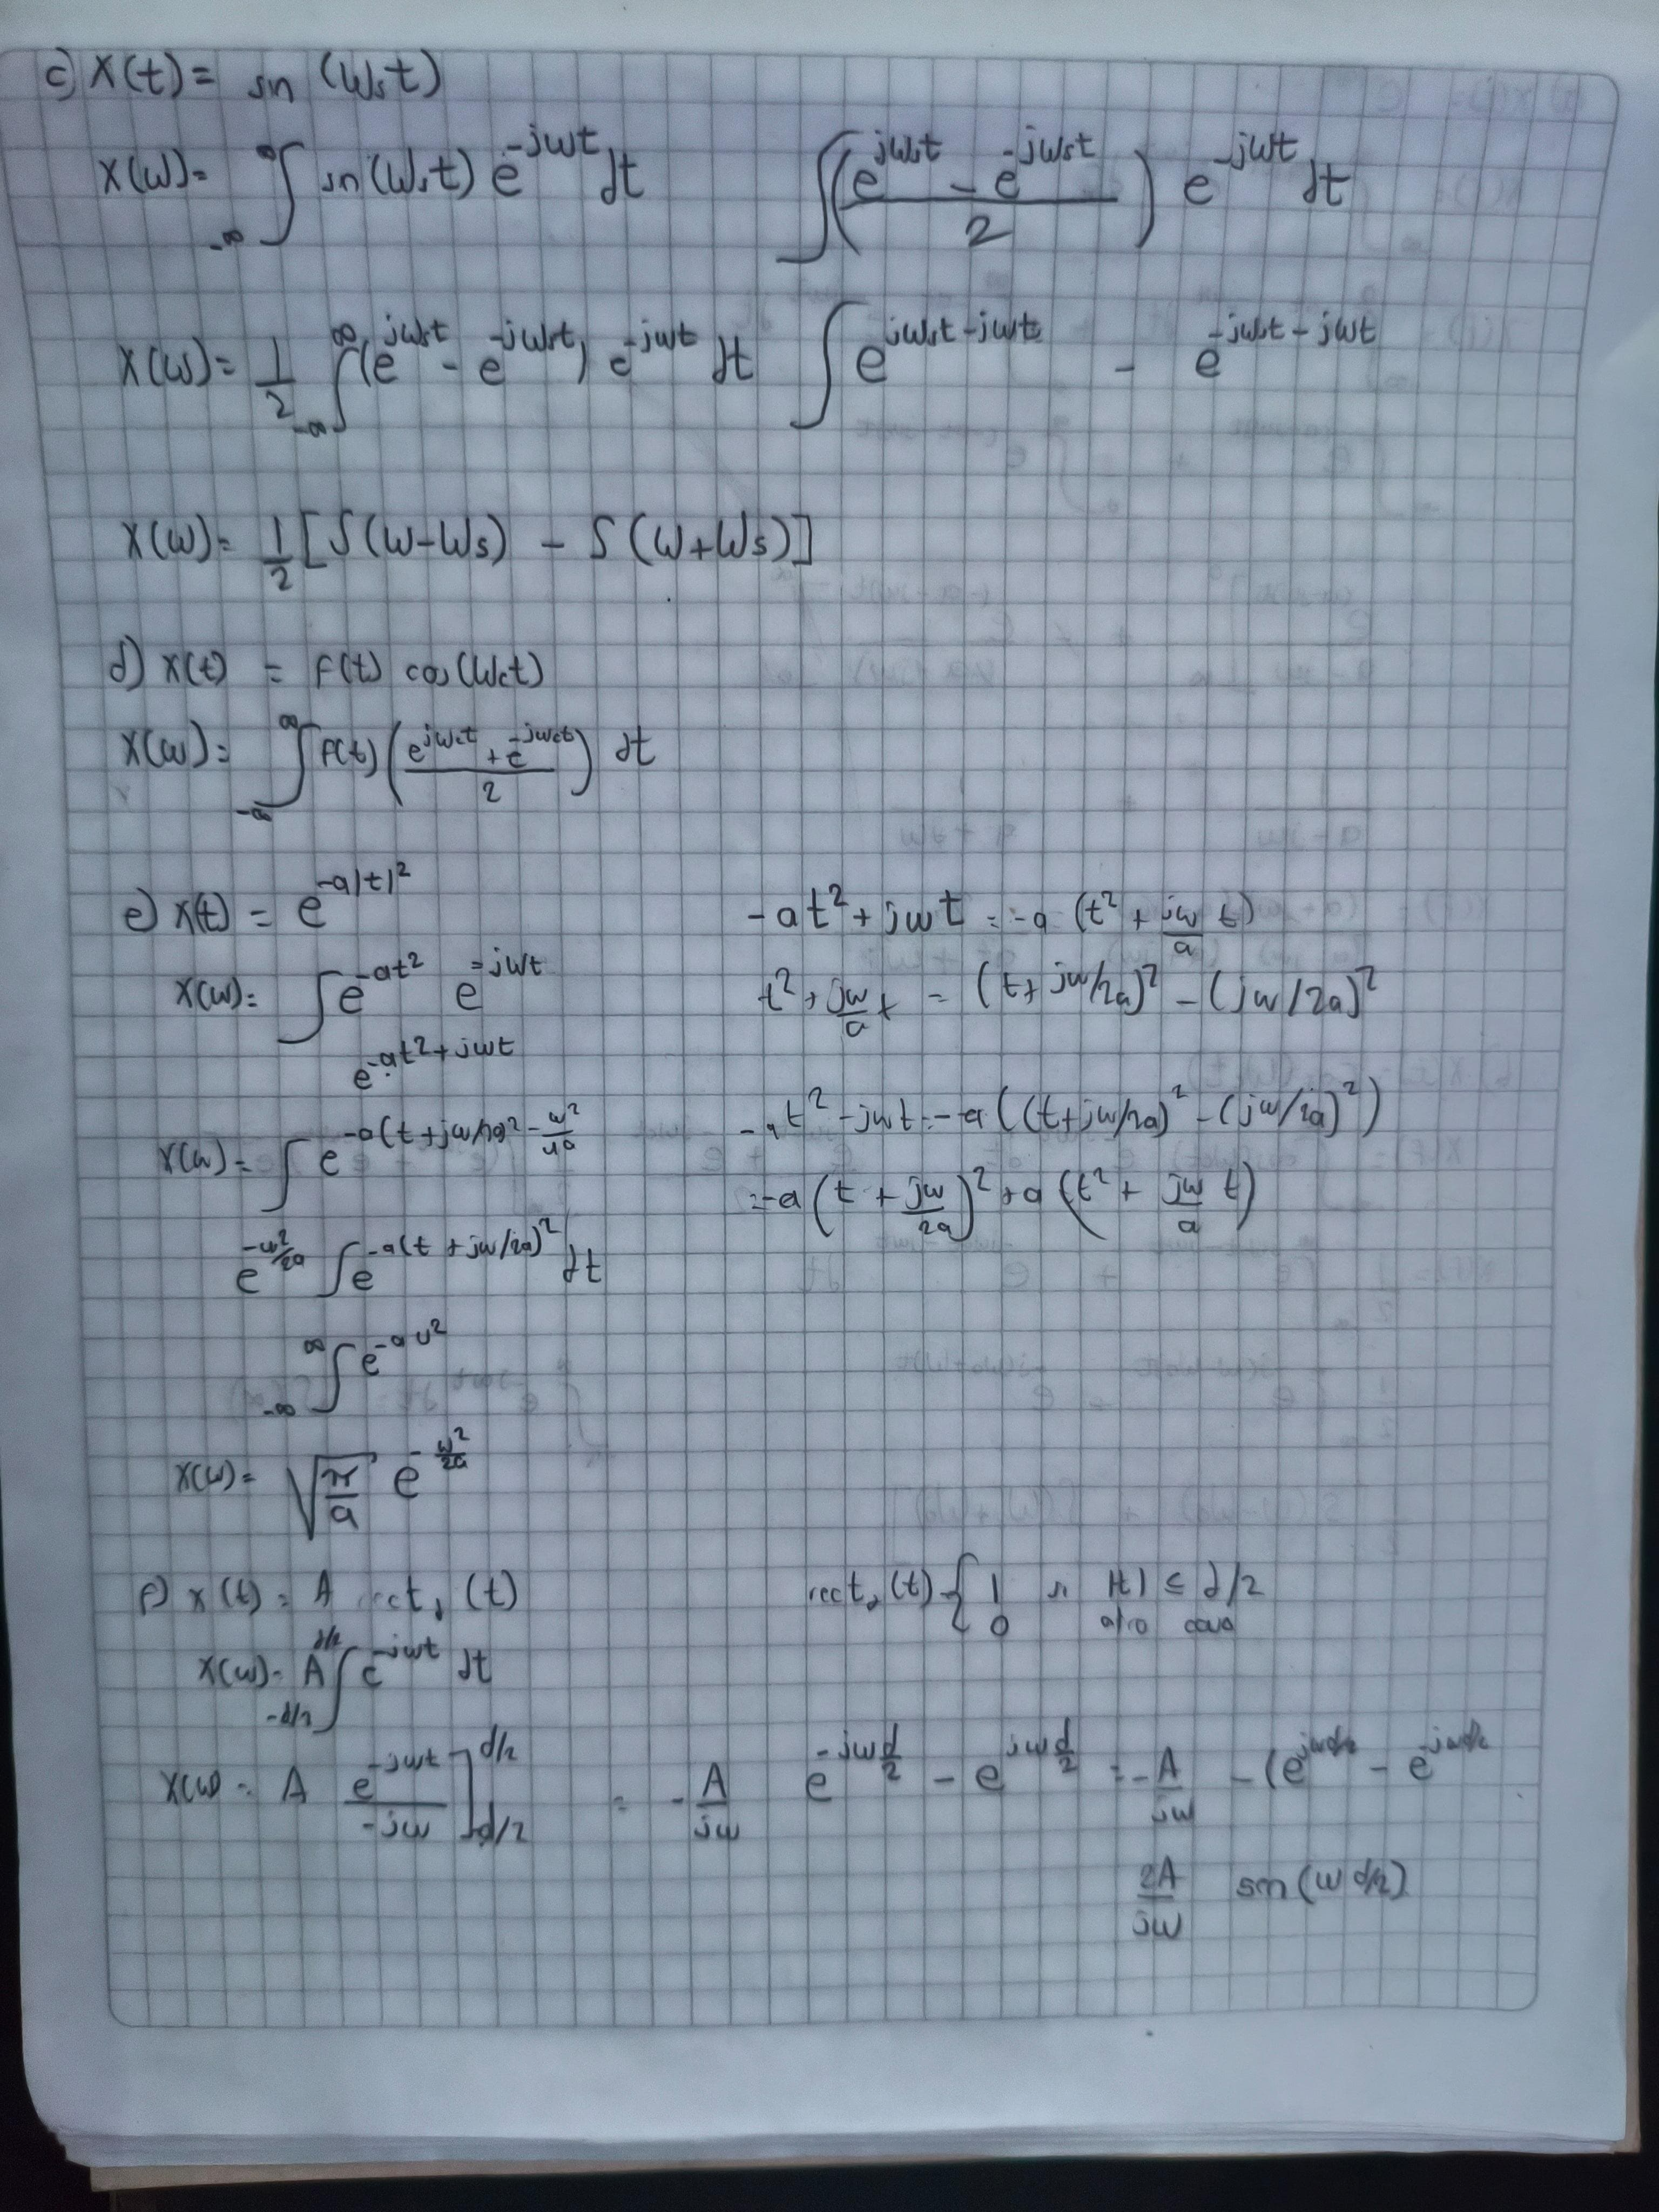

#Punto 4

Aplique las propiedades de la transformada de Fourier para resolver:

**a)**  
$$\mathcal{F} \left\{ e^{-jw_1 t} \cos(w_c t) \right\}, \quad w_1, w_c \in \mathbb{R}$$

**b)**  
$$\mathcal{F} \left\{ u(t) \cos^2(w_c t) \right\}, \quad w_c \in \mathbb{R}$$

**c)**  
$$\mathcal{F}^{-1} \left\{ \frac{7}{w^2 + 6w + 45} \cdot \frac{10}{(8 + j w / 3)^2} \right\}$$


**d)**  
$$\mathcal{F} \left\{ 3t^3 \right\}$$

**e)**  
$$
\frac{B}{T} \sum_{n = -\infty}^{\infty} \left( \frac{1}{a^2 + (w - n\omega_0)^2} + \frac{1}{a + j(w - n\omega_0)} \right)
$$

donde  
$$n \in \{0, \pm 1, \pm 2, \ldots \}, \quad \omega_0 = \frac{2\pi}{T}, \quad B, T \in \mathbb{R}^{+}$$

Ver **Tablas de propiedades** y **Tablas transformada de Fourier**.


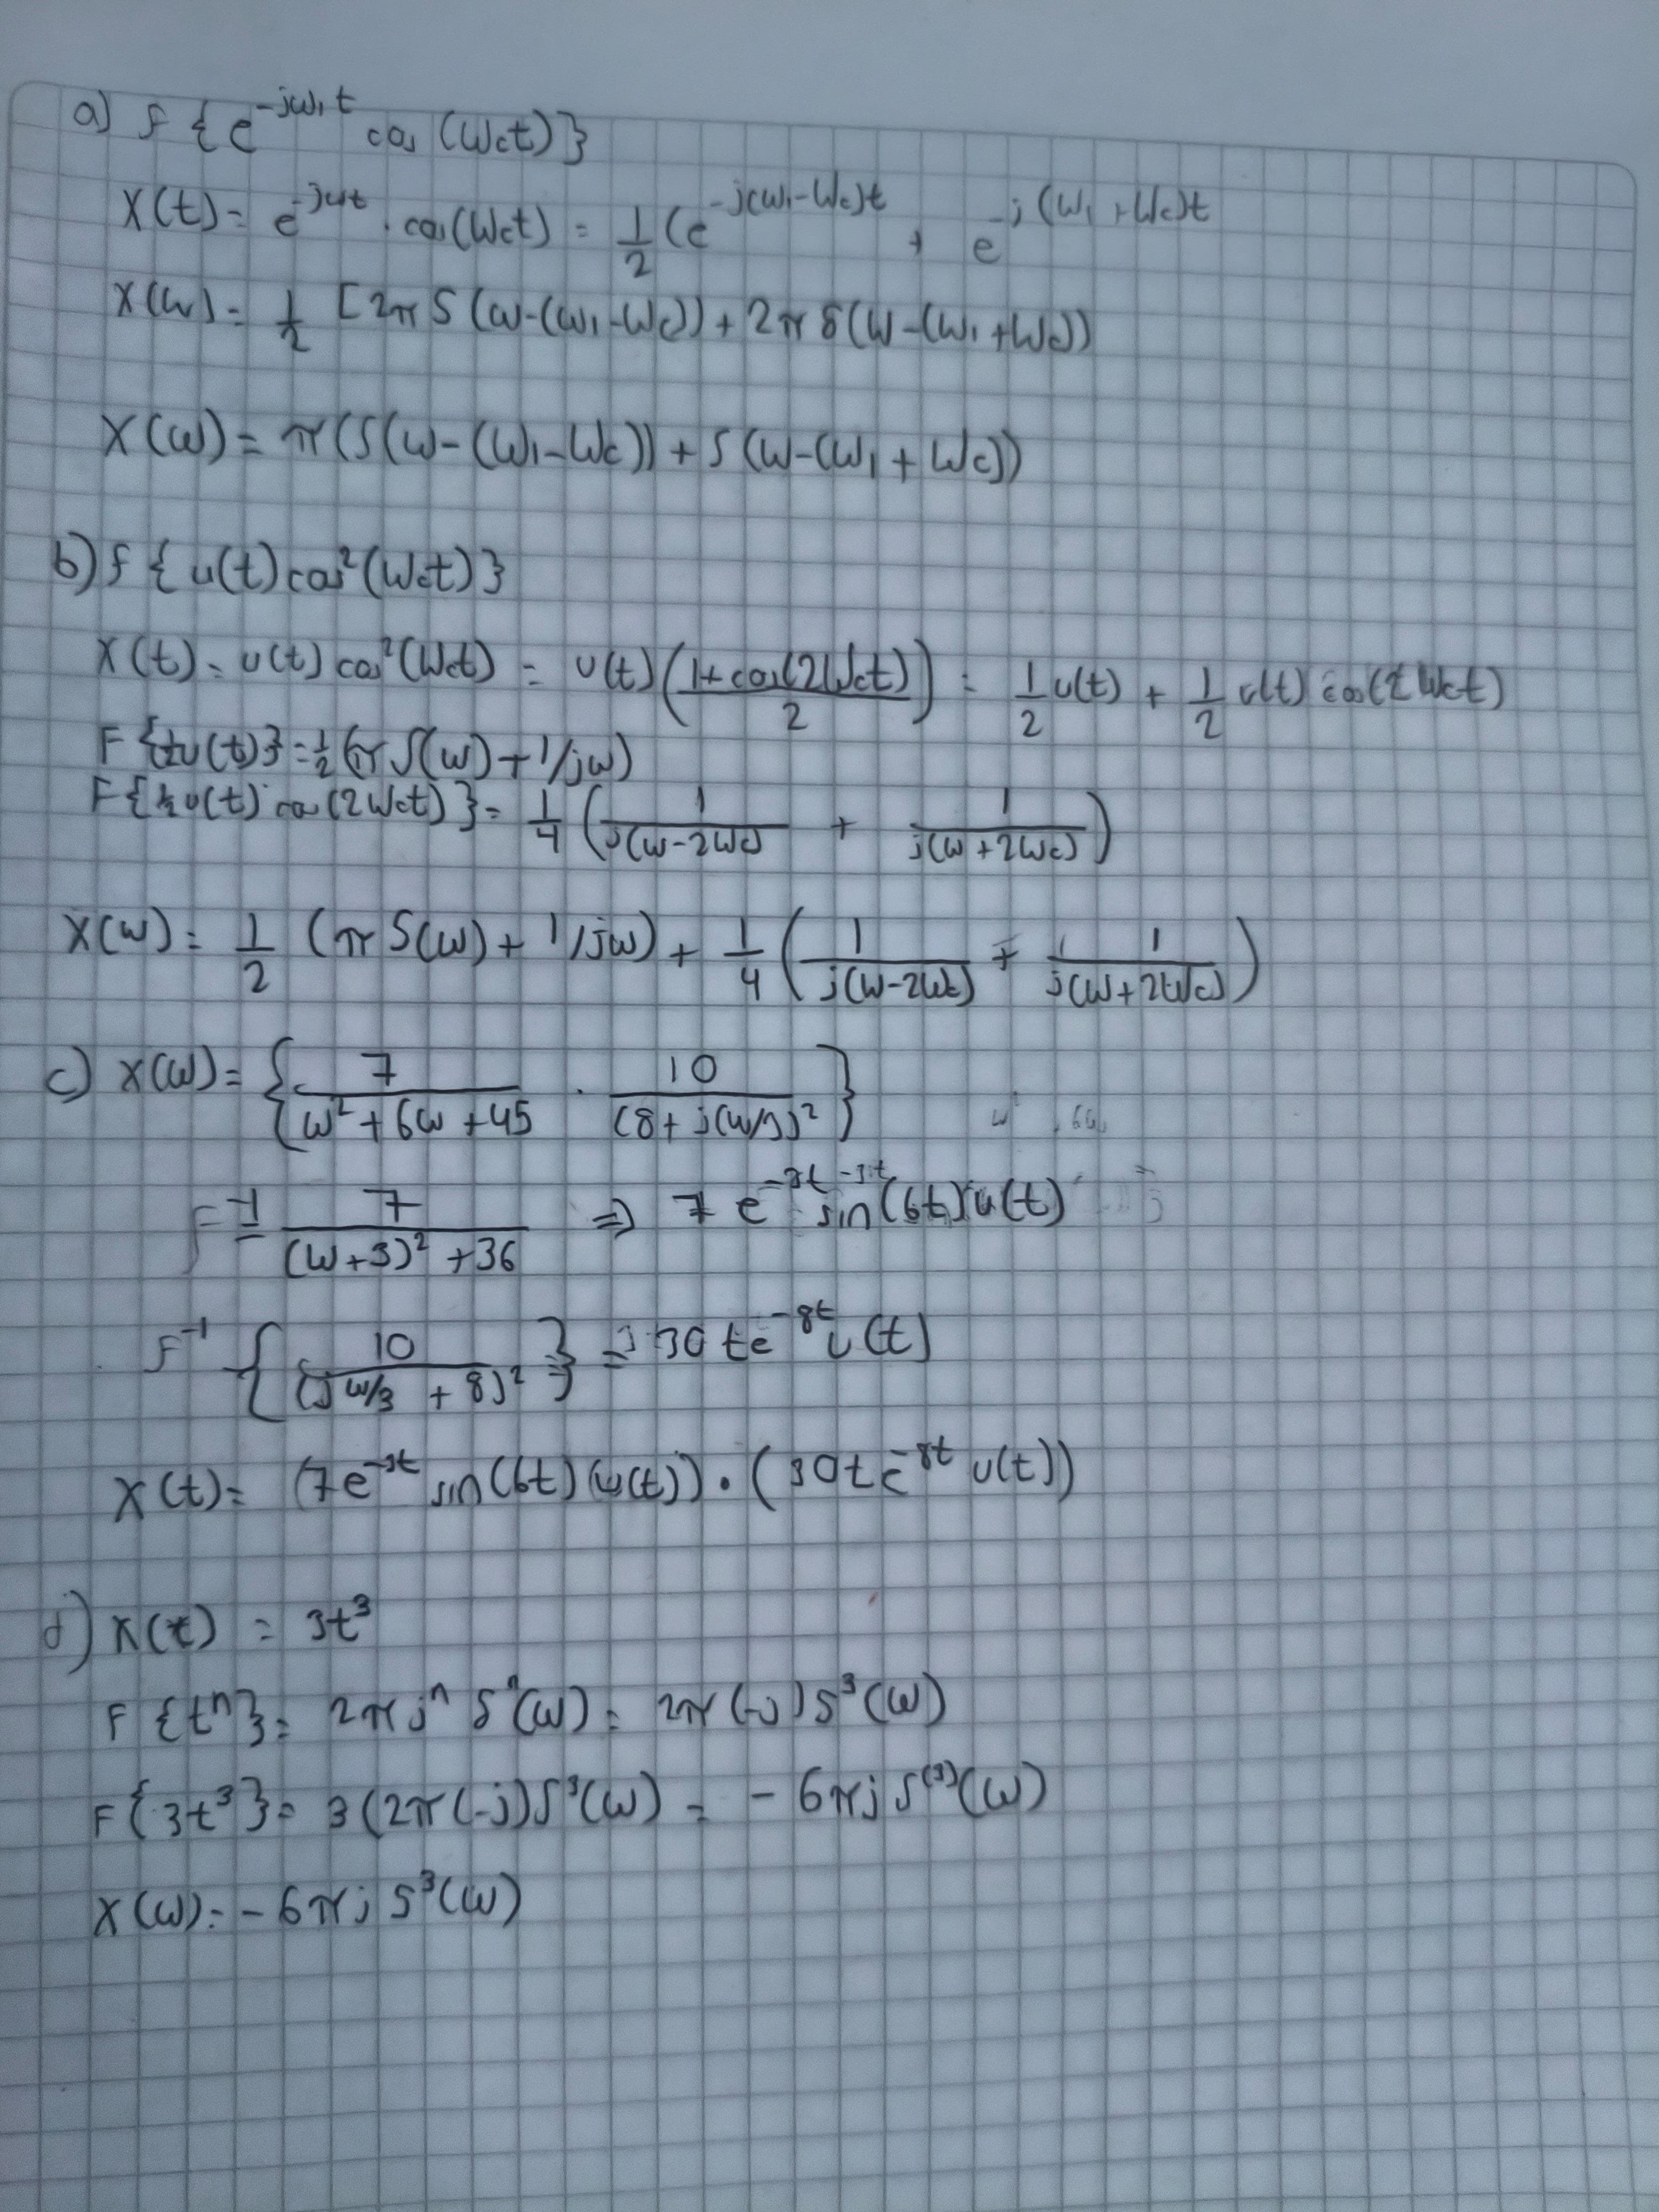

#Punto 5
Consulte en qué consiste la modulación por amplitud por
detección coherente y sus aplicaciones. Genere un ejemplo
ilustrativo sobre Python en el que se grafique las señales en
el tiempo y en frecuencia (utilizando la ‘rfft‘) para: señal
mensaje tipo pulso rectangular y señal mensaje tipo coseno.
El usuario podría definir el índice de modulación de interés.
Ver cuaderno Modulacióon AM.

La modulación por amplitud (AM) con detección coherente es un esquema de modulación donde la señal modulada se define como:

$$
x(t) = [1 + \mu \cdot m(t)] \cdot \cos(2\pi f_c t)
$$

donde:

- \( m(t) \) es la señal mensaje (por ejemplo, un pulso rectangular o un coseno),
- \( \mu \) es el índice de modulación,
- \( f_c \) es la frecuencia de la portadora.

En este método, el receptor debe contar con una portadora sincronizada en fase y frecuencia con la señal transmitida, permitiendo multiplicar la señal recibida por una portadora local para recuperar la señal mensaje. Esto se conoce como detección coherente.

En la práctica, se simulan dos señales mensaje distintas: un pulso rectangular y una señal cosenoidal. Ambas son moduladas y visualizadas en el dominio del tiempo y la frecuencia utilizando la transformada rápida de Fourier (FFT).

Este tipo de modulación se emplea en comunicaciones analógicas como en la radio AM, donde la recuperación precisa del mensaje es crucial.



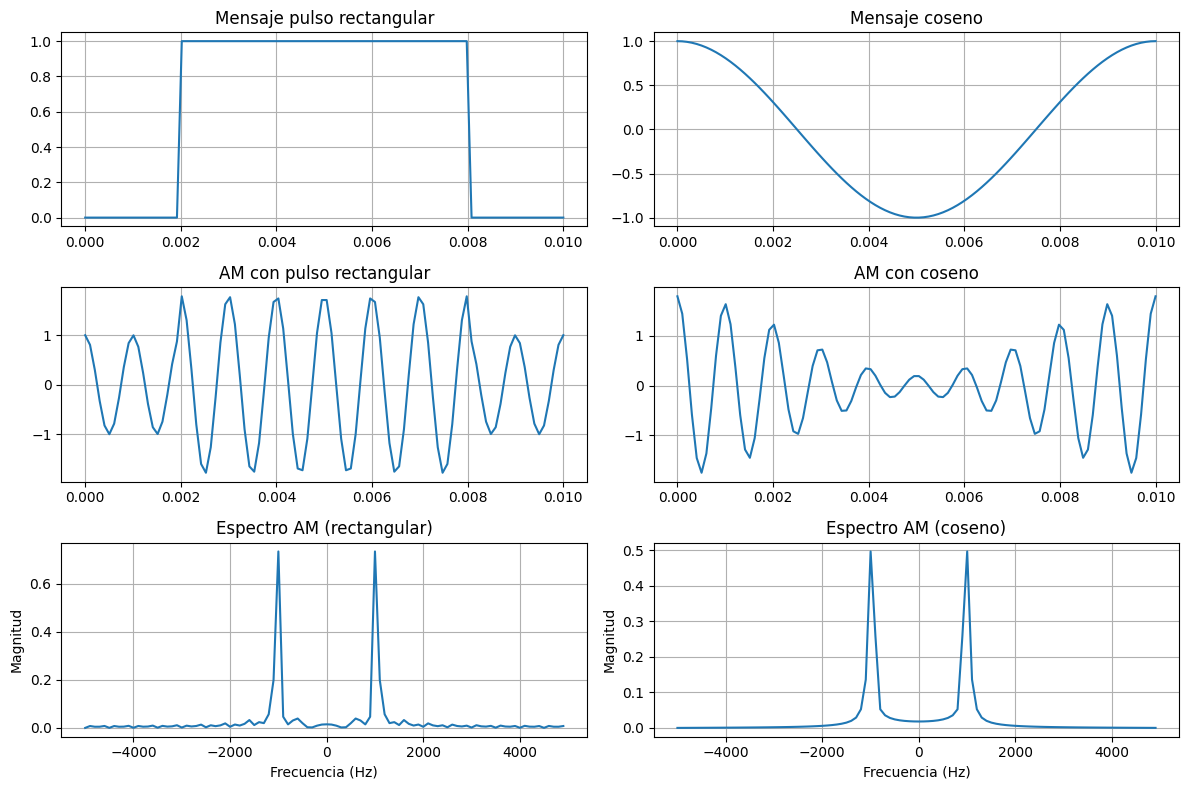

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de simulación
fs = 10000                          # Frecuencia de muestreo (Hz)
t = np.linspace(0, 0.01, int(fs*0.01))  # Vector de tiempo
fc = 1000                          # Frecuencia de portadora (Hz)
fm = 100                           # Frecuencia del mensaje (Hz)
mu = 0.8                           # Índice de modulación

# Señal mensaje: tipo pulso rectangular
mensaje_rect = np.where((t >= 0.002) & (t <= 0.008), 1, 0)

# Señal mensaje: tipo coseno
mensaje_cos = np.cos(2 * np.pi * fm * t)

# Modulación AM
portadora = np.cos(2 * np.pi * fc * t)
senal_am_rect = (1 + mu * mensaje_rect) * portadora
senal_am_cos = (1 + mu * mensaje_cos) * portadora

# FFT y visualización
def graficar_fft(senal, fs, titulo):
    N = len(senal)
    f = np.fft.fftfreq(N, 1/fs)
    fft_vals = np.abs(np.fft.fft(senal)) / N
    plt.plot(np.fft.fftshift(f), np.fft.fftshift(fft_vals))
    plt.title(titulo)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")

# Gráficas
plt.figure(figsize=(12, 8))

# Mensaje
plt.subplot(3, 2, 1)
plt.plot(t, mensaje_rect)
plt.title("Mensaje pulso rectangular")
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(t, mensaje_cos)
plt.title("Mensaje coseno")
plt.grid()

# Señales moduladas
plt.subplot(3, 2, 3)
plt.plot(t, senal_am_rect)
plt.title("AM con pulso rectangular")
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(t, senal_am_cos)
plt.title("AM con coseno")
plt.grid()

# FFT
plt.subplot(3, 2, 5)
graficar_fft(senal_am_rect, fs, "Espectro AM (rectangular)")
plt.grid()

plt.subplot(3, 2, 6)
graficar_fft(senal_am_cos, fs, "Espectro AM (coseno)")
plt.grid()

plt.tight_layout()
plt.show()


#Punto 7
Consulte en qué consiste la distorsión total de armónicos (Total Harmonic Distortion-THD)) y el factor de potencia en un circuito eléctrico. ¿Cómo puede calcularse el THD desde la FFT?. ¿Cómo puede calcularse la distorsión del factor de potencia con base al THD?. Genere un ejemplo ilustrativo para el cálculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos. Ver cuaderno Rectificador RC y THD.

La **distorsión total de armónicos (THD)** es una medida que indica el contenido de armónicos en una señal respecto a su componente fundamental. Se expresa como el cociente entre la raíz cuadrada de la suma de los cuadrados de las magnitudes de los armónicos superiores y la magnitud de la componente fundamental. Un THD alto indica una señal más distorsionada y, por tanto, de menor calidad.

El **factor de potencia** cuantifica qué tan eficientemente se utiliza la potencia en un circuito. Este no solo depende del desfase entre corriente y voltaje (factor de desplazamiento), sino también del contenido armónico de la corriente. Por ello, el factor de potencia total se puede expresar como el producto entre el coseno del ángulo de desfase y el **factor de distorsión**, que se relaciona con el THD mediante la expresión:

$$
\text{Factor de distorsión} = \frac{1}{\sqrt{1 + \text{THD}^2}}
$$

$$
\text{Factor de potencia total} = \cos(\phi) \cdot \frac{1}{\sqrt{1 + \text{THD}^2}}
$$

El **THD puede calcularse a partir de la FFT** (Transformada Rápida de Fourier) de la señal de corriente. La FFT permite descomponer la señal en sus componentes frecuenciales. Identificando la magnitud de la componente fundamental \( V_1 \) y las de los armónicos \( V_2, V_3, ..., V_n \), el THD se calcula como:

$$
\text{THD} = \frac{\sqrt{V_2^2 + V_3^2 + \dots + V_n^2}}{V_1}
$$

Este valor permite evaluar la distorsión que afecta la eficiencia del circuito y calcular el impacto que tiene sobre el factor de potencia.


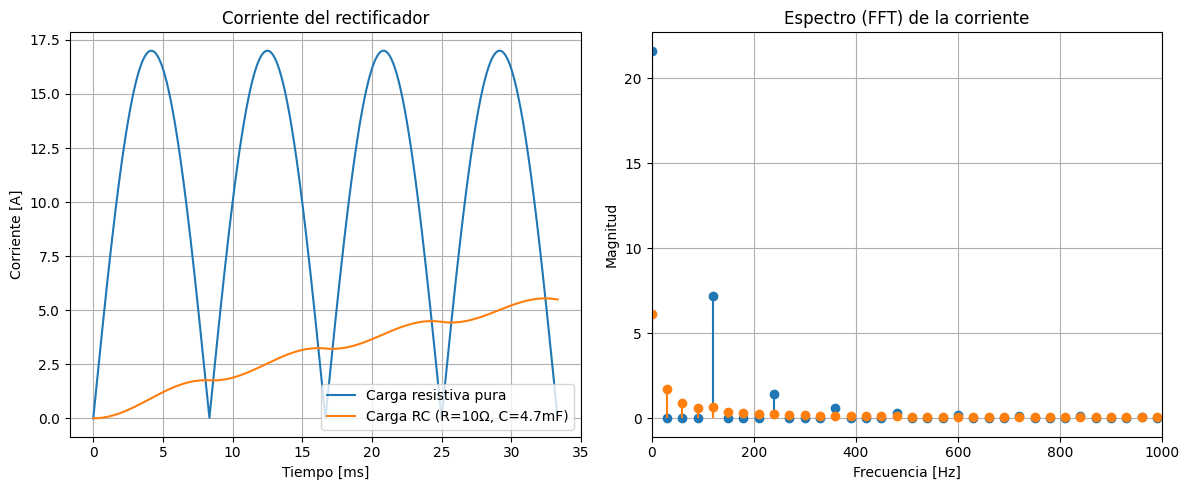

------ RESULTADOS ------
Carga resistiva: THD = 112062.07 %, Factor de distorsión = 0.0009
Carga RC:        THD = 1121.22 %, Factor de distorsión = 0.0888


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros generales
f = 60                      # Frecuencia fundamental [Hz]
w = 2 * np.pi * f
T = 1 / f
t = np.linspace(0, 2*T, 2000)  # Dos ciclos
Vmax = 170                  # Voltaje pico (120 Vrms)

# Función para simular el voltaje rectificado de onda completa
def onda_rectificada(vin):
    return np.abs(vin)

# Señal de entrada
vin = Vmax * np.sin(w * t)

# Casos: 1. Carga resistiva, 2. Carga RC
R_values = [10]
C_values = [1e-3, 4.7e-3]  # puedes cambiar estos valores

def simular_rectificador(R, C=None):
    if C is None:
        # Carga resistiva pura
        vout = onda_rectificada(vin)
        i = vout / R
        label = "Carga resistiva pura"
    else:
        # Carga RC: resolver con ecuación diferencial por Euler
        dt = t[1] - t[0]
        vout = np.zeros_like(t)
        for i in range(1, len(t)):
            v_rec = onda_rectificada(vin[i])
            dv = (v_rec - vout[i-1]) / (R * C)
            vout[i] = vout[i-1] + dv * dt
        i = vout / R
        label = f"Carga RC (R={R}Ω, C={C*1e3:.1f}mF)"
    return i, label

def calcular_thd(i, fs):
    N = len(i)
    I_fft = fft(i)
    I_mag = np.abs(I_fft[:N//2]) * 2 / N
    freqs = fftfreq(N, 1/fs)[:N//2]

    fundamental_idx = np.argmax(freqs >= f)
    V1 = I_mag[fundamental_idx]
    harmonics = np.delete(I_mag, fundamental_idx)
    THD = np.sqrt(np.sum(harmonics**2)) / V1
    return THD, V1, I_mag, freqs

fs = 1 / (t[1] - t[0])  # frecuencia de muestreo

# Simulación para carga resistiva
i_res, label_res = simular_rectificador(R=R_values[0])
thd_res, V1_res, I_mag_res, freqs_res = calcular_thd(i_res, fs)
fd_res = 1 / np.sqrt(1 + thd_res**2)

# Simulación para carga RC
i_rc, label_rc = simular_rectificador(R=R_values[0], C=C_values[1])
thd_rc, V1_rc, I_mag_rc, freqs_rc = calcular_thd(i_rc, fs)
fd_rc = 1 / np.sqrt(1 + thd_rc**2)

# Gráficas
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(t*1000, i_res, label=label_res)
plt.plot(t*1000, i_rc, label=label_rc)
plt.xlabel("Tiempo [ms]")
plt.ylabel("Corriente [A]")
plt.title("Corriente del rectificador")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.stem(freqs_res, I_mag_res, linefmt='C0-', markerfmt='C0o', basefmt=' ')
plt.stem(freqs_res, I_mag_rc, linefmt='C1-', markerfmt='C1o', basefmt=' ')
plt.xlim(0, 1000)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro (FFT) de la corriente")
plt.grid(True)
plt.tight_layout()
plt.show()

# Resultados
print("------ RESULTADOS ------")
print(f"Carga resistiva: THD = {thd_res*100:.2f} %, Factor de distorsión = {fd_res:.4f}")
print(f"Carga RC:        THD = {thd_rc*100:.2f} %, Factor de distorsión = {fd_rc:.4f}")
